In [ ]:
#Exercise 2

#MY OWN CODE:

In [125]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

n = 100
x = np.random.rand(n,1)
y = 2.0 + 5 * x * x + 0.1 * np.random.randn(n,1)

X = np.zeros((100,3))
X[:,0] = 1
X[:,1] = x[:,0]
X[:,2] = x[:,0]**2

beta = np.linalg.inv(X.T @ X) @ X.T @ y
y_tilde = X @ beta

MSE = (1/n)*((y-y_tilde).T @ (y-y_tilde))[0,0]

print("MY OWN CODE\n-------------------")
print(f"MSE: {MSE}")
print(f"R2: {r2_score(y,y_tilde):g}")

MY OWN CODE
-------------------
MSE: 0.008170598483664089
R2: 0.995874


In [127]:
#SCIKIT-LEARN:

In [129]:
linreg = LinearRegression(fit_intercept = False)
linreg.fit(X, y)
y_skl = linreg.predict(X)

print("SCIKIT-LEARN\n------------------")
print(f"MSE: {mean_squared_error(y,y_skl):g}")
print(f"R2: {r2_score(y,y_skl):g}")

SCIKIT-LEARN
------------------
MSE: 0.0081706
R2: 0.995874


In [131]:
#Exercise 3

In [133]:
#a
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

np.random.seed()
n = 100
maxdegree = 6 #6 because have to add an intercept as well
x = np.linspace(-3,3,n).reshape(-1,1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0,0.1,x.shape)

X = np.zeros((n, maxdegree))
X[:,1] = x[:,0]
X[:,2] = x[:,0]**2
X[:,3] = x[:,0]**3
X[:,4] = x[:,0]**4
X[:,5] = x[:,0]**5

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [135]:
#b
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_tilde = X_train @ beta
MSE = (1/(n*(1-test_size))) * ((y_train - y_tilde).T @ (y_train - y_tilde))[0,0]

y_predict = X_test @ beta
MSE_predict = (1/(n*test_size)) * ((y_test - y_predict).T @ (y_test - y_predict))[0,0]

print("SCIKIT-LEARN\n------------------")
print(f"Coefficients: {beta[:,0]}")
print(f"MSE Train: {MSE}")
print(f"MSE Test: {MSE_predict}")

#CAN'T SEE WHERE IN THE CODE I HAVE WRITTEN WRONG TO GET THE ERROR?

LinAlgError: Singular matrix

Text(0, 0.5, 'Mean squared error')

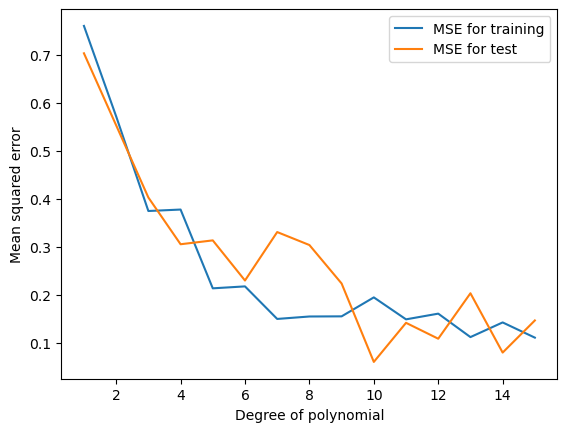

In [137]:
maxdegree = 16  # 15th degree polynomial plus intercept
degrees = np.array(range(1, maxdegree)) # loop from 1 to 15 degrees.
train_mse = []
test_mse = []

# Create design matrix first
X = np.zeros((n, maxdegree))
for degree in degrees:
    X[:, degree] = x[:, 0]**degree

# Then loop over the degrees again to do the mean error calculations
for degree in degrees:
    # Split into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X[:, :degree], y, test_size=0.2)
    linreg.fit(X_train, y_train)
    y_tilde = linreg.predict(X_train)
    y_predict = linreg.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_tilde))
    test_mse.append(mean_squared_error(y_test, y_predict))

# Plotting
plt.plot(degrees, train_mse, label="MSE for training")
plt.plot(degrees, test_mse, label="MSE for test")
plt.legend()
plt.xlabel("Degree of polynomial")
plt.ylabel("Mean squared error")  

In [ ]:
#This plot varies significantly each time the randomized data is run.
#Sometimes it is similar to Figure 2.11 of Hastie et al., and other times
#both training and testing MSE follow a similar trend even as the polynomial degree 
#increases. However, it seems like the training data is optimal at degree = 15 and
#test data is optimal at around degree = 11.